In [1]:
# Initial imports

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Create a reference to the file. 
file_path = Path("../Data/diseases.sqlite")

In [3]:
# Connect to and read from the database
conn = sqlite3.connect(file_path)
symptoms_df = pd.read_sql_query("SELECT * FROM diseases", conn)
conn.close()

In [4]:
# Load the Data
symptoms_df[0:14]

,acidity,anxiety,bladder_discomfort,blurred_and_distorted_vision,breathlessness,burning_micturition,chest_pain,chills,congestion,continuous_feel_of_urine,...,spotting_ urination,stiff_neck,stomach_pain,sweating,swelled_lymph_nodes,throat_irritation,visual_disturbances,vomiting,watering_from_eyes,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [5]:
# Define features set
X = symptoms_df.copy()
X.drop("Disease", axis=1, inplace=True)
X.head()

,acidity,anxiety,bladder_discomfort,blurred_and_distorted_vision,breathlessness,burning_micturition,chest_pain,chills,congestion,continuous_feel_of_urine,...,slurred_speech,spotting_ urination,stiff_neck,stomach_pain,sweating,swelled_lymph_nodes,throat_irritation,visual_disturbances,vomiting,watering_from_eyes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Define target vector
y =symptoms_df["Disease"].ravel()
y[:5]

array([6, 6, 6, 6, 6], dtype=int64)

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [8]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [9]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [10]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_model.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [52]:
# Create a DataFrame to compare actual vs. predicted labels
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

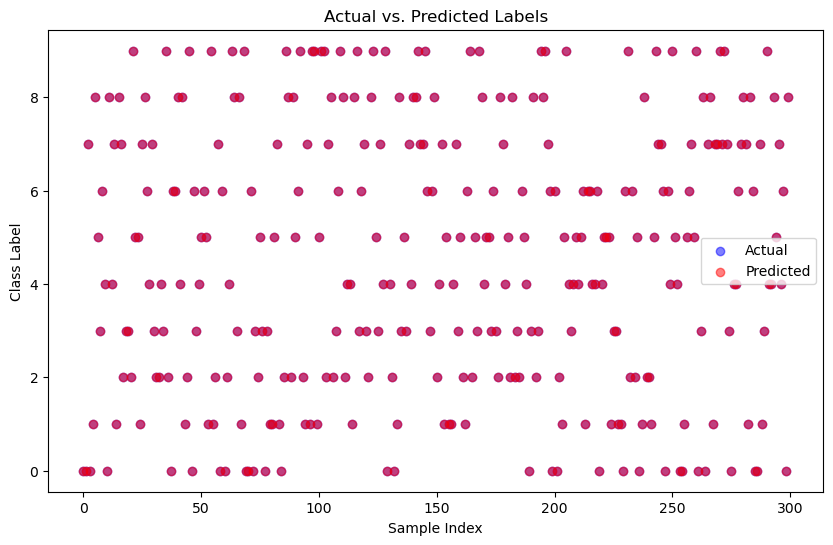

In [53]:
# Plot actual vs. predicted labels
plt.figure(figsize=(10, 6))
plt.scatter(df_compare.index, df_compare['Actual'], color='blue', label='Actual', alpha=0.5)
plt.scatter(df_compare.index, df_compare['Predicted'], color='red', label='Predicted', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()

In [55]:
# Calculating the confusion matrix
# Create the confusion matrix
cm = np.random.randint(0, 10, size=(10, 10))

# Define class labels for all 10 classes
class_labels = ['Allergy', 'Drug Reaction', 'Migraine', 'Common Cold', 'Pneumonia', 'Heart attack', 'Fungal infection', 'Hypoglycemia', 'Urinary tract infection', 'Chicken pox']

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Display the confusion matrix DataFrame
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
                         Allergy  Drug Reaction  Migraine  Common Cold  \
Allergy                        7              3         5            6   
Drug Reaction                  9              7         9            7   
Migraine                       1              1         4            5   
Common Cold                    7              0         2            2   
Pneumonia                      4              3         3            8   
Heart attack                   5              3         0            4   
Fungal infection               5              9         6            5   
Hypoglycemia                   4              9         4            8   
Urinary tract infection        8              2         6            6   
Chicken pox                    1              3         7            4   

                         Pneumonia  Heart attack  Fungal infection  \
Allergy                          9             2                 6   
Drug Reaction              

In [56]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [57]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Allergy,Drug Reaction,Migraine,Common Cold,Pneumonia,Heart attack,Fungal infection,Hypoglycemia,Urinary tract infection,Chicken pox
Allergy,7,3,5,6,9,2,6,2,1,2
Drug Reaction,9,7,9,7,9,3,6,8,0,2
Migraine,1,1,4,5,5,9,8,0,3,0
Common Cold,7,0,2,2,9,0,4,4,4,1
Pneumonia,4,3,3,8,2,1,1,3,2,6
Heart attack,5,3,0,4,3,0,5,2,4,0
Fungal infection,5,9,6,5,7,7,8,6,3,7
Hypoglycemia,4,9,4,8,5,8,2,5,9,9
Urinary tract infection,8,2,6,6,6,4,9,0,9,5
Chicken pox,1,3,7,4,6,0,3,1,7,1


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        30

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

